# Jobcloud data exploration part 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
print(sys.version); print(pd.__version__)

3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
0.24.2


### costum functions

In [3]:
def value_counts_df(df_input, col_input, sort_col='counts', ascending_input=True):
    return df_input[col_input].value_counts().rename_axis(col_input).reset_index(name='counts').sort_values(by=sort_col, ascending=ascending_input)

### reading in data

In [4]:
df = pd.read_csv('Data/jobcloud_propulsion_dataset.csv', delimiter = ';', parse_dates = ['start_dt', 'end_dt'])

In [5]:
df.head()

,id,start_dt,end_dt,1d_view_cnt,10d_view_cnt,30d_view_cnt,package_id,industry_name,job_location,job_postal_code,contract_pct_from,contract_pct_to,title
0,8501672,2018-10-25,2018-11-26,0.2372,0.4565,0.7327,B,Industrie diverse,Espace Mittelland,NaN,100.0,100.0,Softwarearchitekt / Projektmanager (m/w) - All...
1,8501682,2018-10-25,2018-11-26,0.2883,0.5826,1.0991,B,Maschinen-/Anlagenbau,Region Biel,NaN,100.0,100.0,Prozessingenieur Lasertechnologie - Industrial...
2,8570830,2018-11-26,2018-12-28,0.1982,0.8468,1.1532,B,Industrie diverse,Espace Mittelland,NaN,100.0,100.0,Softwarearchitekt / Projektmanager (m/w) - All...
3,8649301,2019-01-08,2019-02-08,0.2883,0.7177,1.4835,B,Maschinen-/Anlagenbau,Espace Mittelland,NaN,100.0,100.0,Projektleiter (m/w) - Werkzeug- oder Maschinenbau
4,8730602,2019-02-12,2019-02-21,0.3574,0.7297,0.7297,B,Industrie diverse,Region Biel,NaN,100.0,100.0,Fachverantwortlichen Metrologie - Produkteentw...


In [6]:
df.shape

(103123, 13)

In [7]:
df['title'].values[550:580]

array(['Sachbearbeitung Controlling / Finanzbuchhaltung 100%',
       'Maschinenbau-Ingenieur als PROJEKTLEITER MASCHINEN-/ANLAGENBAU',
       'Versicherungs-Spezialist / Assekuranz-Profi als  AGENTUR-LEITER / GEBIETSVERANTWORTLICHER',
       'Versicherungs-Profi / Verkaufs-Spezialist als  KUNDENBETREUER / AGENTURBERATER',
       'Webshop Koordinator/in 100%',
       'Versicherungs-Spezialist / Assekuranz-Profi als SENIOR ACCOUNT / CONSULTING MANAGER',
       'Maschinenbau-Ingenieur als PROJEKTLEITER MASCHINEN-/ANLAGENBAU',
       'Oeffentlichkeitsarbeit und Kommunikation (60%)',
       'Versicherungs-Profi / Verkaufs-Spezialist als  KUNDENBETREUER / AGENTURBERATER',
       'Versicherungs-Spezialist / Assekuranz-Profi als  AGENTUR-LEITER / GEBIETSVERANTWORTLICHER',
       'Treuhand- / Steuer-Experte / Wirtschaftsprüfer als GESCHÄFTSFÜHRER /TEILHABER (w/m)',
       'Oeffentlichkeitsarbeit und Kommunikation (60-80%)',
       'Sachbearbeitung Controlling / Finanzbuchhaltung 80 - 100%',
  

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103123 entries, 0 to 103122
Data columns (total 13 columns):
id                   103123 non-null int64
start_dt             103123 non-null datetime64[ns]
end_dt               103123 non-null datetime64[ns]
1d_view_cnt          102978 non-null float64
10d_view_cnt         102978 non-null float64
30d_view_cnt         102978 non-null float64
package_id           103123 non-null object
industry_name        101882 non-null object
job_location         103103 non-null object
job_postal_code      52812 non-null object
contract_pct_from    102322 non-null float64
contract_pct_to      102322 non-null float64
title                103123 non-null object
dtypes: datetime64[ns](2), float64(5), int64(1), object(5)
memory usage: 10.2+ MB


In [9]:
df.describe()

,id,1d_view_cnt,10d_view_cnt,30d_view_cnt,contract_pct_from,contract_pct_to
count,1.031230e+05,102978.000000,102978.000000,102978.000000,102322.000000,102322.000000
mean,8.418143e+06,0.284620,0.647438,0.997292,90.635034,96.459872
std,2.029115e+05,0.303066,0.656563,1.096760,18.170531,12.184531
min,4.140807e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.245787e+06,0.126100,0.252300,0.297300,80.000000,100.000000
50%,8.402251e+06,0.207200,0.468500,0.681700,100.000000,100.000000
75%,8.585908e+06,0.348300,0.816800,1.315300,100.000000,100.000000
max,8.834549e+06,33.078100,48.801800,54.402400,100.000000,100.000000


## Missing Values

In [10]:
df.isnull().sum()

id                       0
start_dt                 0
end_dt                   0
1d_view_cnt            145
10d_view_cnt           145
30d_view_cnt           145
package_id               0
industry_name         1241
job_location            20
job_postal_code      50311
contract_pct_from      801
contract_pct_to        801
title                    0
dtype: int64

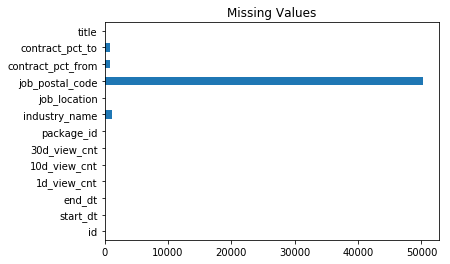

In [11]:
df.isnull().sum().plot.barh(title='Missing Values')
None

## Numerical variables

### diff_start_end

In [12]:
df['diff_start_end'] = df['end_dt'] - df['start_dt']

In [13]:
df['diff_start_end_days'] = df['diff_start_end'].dt.days
df['diff_start_end_days_str'] = df['diff_start_end'].dt.days.apply(str)

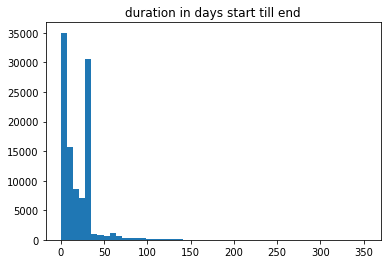

In [14]:
plt.hist(df['diff_start_end'].dt.days, bins=50)
plt.title('duration in days start till end')
None

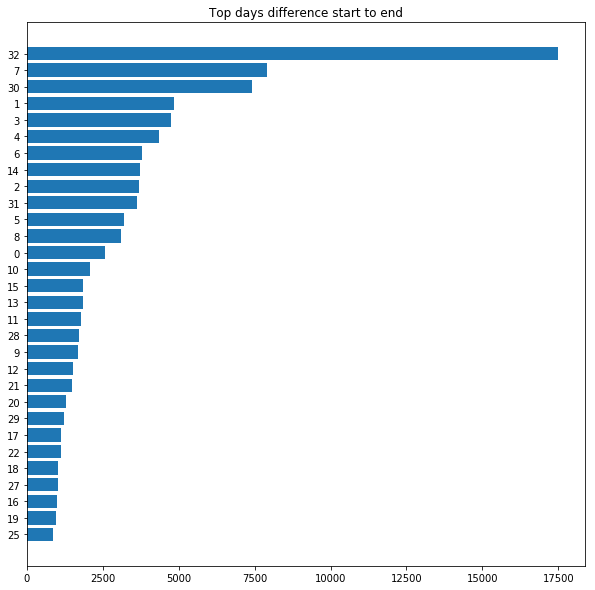

In [15]:
dfc = value_counts_df(df, 'diff_start_end_days_str').tail(30)
fig, ax = plt.subplots(figsize = (10, 10))
plt.barh(dfc['diff_start_end_days_str'], dfc['counts'])
plt.title('Top days difference start to end')
None

### 1d_view_cnt

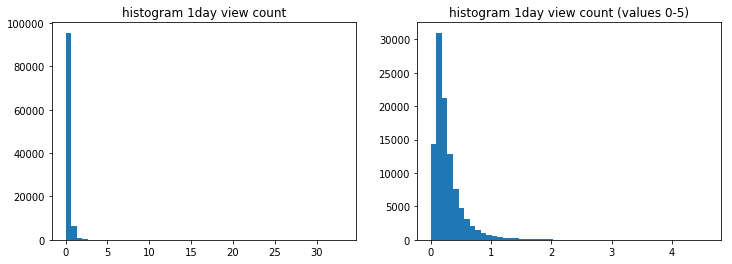

In [19]:
fig, ax = plt.subplots(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['1d_view_cnt'].dropna(), bins=50)
plt.title('histogram 1day view count')
plt.subplot(1, 2, 2)
plt.hist(df.loc[df['1d_view_cnt'] < 5]['1d_view_cnt'], bins=50)
plt.title('histogram 1day view count (values 0-5)')
None

### 10d_view_cnt

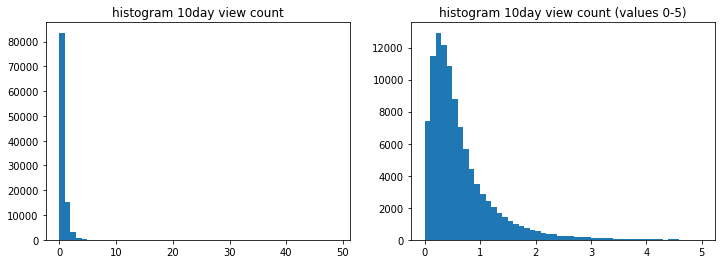

In [21]:
fig, ax = plt.subplots(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['10d_view_cnt'].dropna(), bins=50)
plt.title('histogram 10day view count')
plt.subplot(1, 2, 2)
plt.hist(df.loc[df['10d_view_cnt'] < 5]['10d_view_cnt'], bins=50)
plt.title('histogram 10day view count (values 0-5)')
None

### 30d_view_cnt

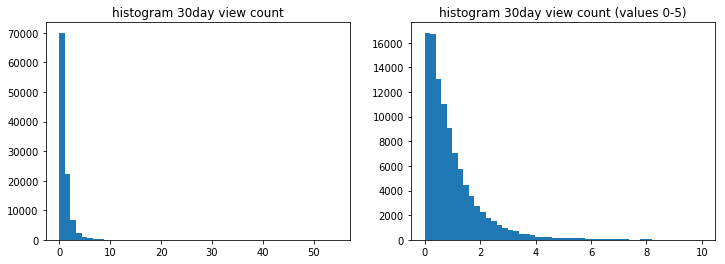

In [23]:
fig, ax = plt.subplots(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['30d_view_cnt'].dropna(), bins=50)
plt.title('histogram 30day view count')
plt.subplot(1, 2, 2)
plt.hist(df.loc[df['30d_view_cnt'] < 10]['30d_view_cnt'], bins=50)
plt.title('histogram 30day view count (values 0-5)')
None

#### filter for days > 30

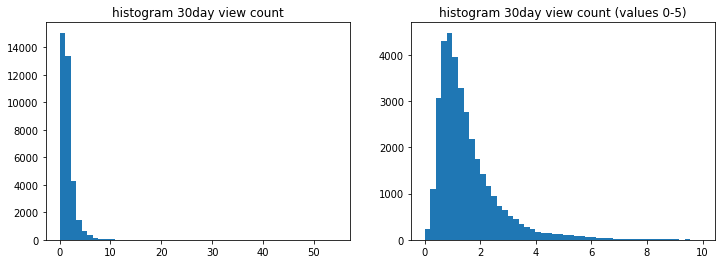

In [25]:
fig, ax = plt.subplots(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.hist(df.loc[df['diff_start_end_days'] >= 30 ]['30d_view_cnt'].dropna(), bins=50)
plt.title('histogram 30day view count')
plt.subplot(1, 2, 2)
plt.hist(df.loc[(df['diff_start_end_days'] >= 30) & (df['30d_view_cnt'] < 10)]['30d_view_cnt'], bins=50)
plt.title('histogram 30day view count (values 0-5)')
None

In [26]:
df.loc[(df['diff_start_end_days'] >= 30) & (df['30d_view_cnt'] < 20)].head().loc[:,['1d_view_cnt', '10d_view_cnt', '30d_view_cnt']]

,1d_view_cnt,10d_view_cnt,30d_view_cnt
0,0.2372,0.4565,0.7327
1,0.2883,0.5826,1.0991
2,0.1982,0.8468,1.1532
3,0.2883,0.7177,1.4835
5,0.6456,1.3604,2.4144


### contract_pct_from and contract_pct_to

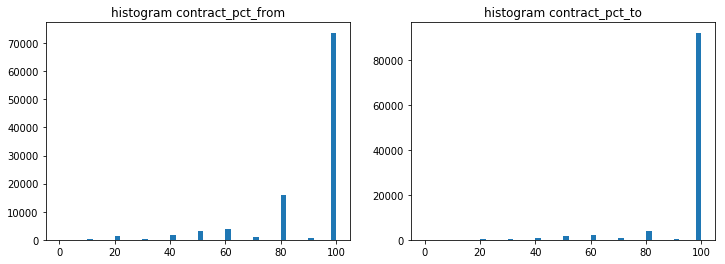

In [29]:
fig, ax = plt.subplots(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['contract_pct_from'].dropna(), bins=50)
plt.title('histogram contract_pct_from')
plt.subplot(1, 2, 2)
plt.hist(df['contract_pct_to'].dropna(), bins=50)
plt.title('histogram contract_pct_to')
None

## Categorical variables

### id

In [30]:
df['id'].unique().shape, df.shape

((102723,), (103123, 16))

In [31]:
df.shape[0] - df['id'].unique().shape[0]

400

400 non-unique ids

### contract_pct_type

combining contract_pct_from and contract_pct_to

In [32]:
df['contract_pct_type'] = [str(x) + '_' + str(y) for (x, y) in zip(df['contract_pct_from'], df['contract_pct_to']) ]

In [33]:
df['contract_pct_type'].values[:5]

array(['100.0_100.0', '100.0_100.0', '100.0_100.0', '100.0_100.0',
       '100.0_100.0'], dtype=object)

In [34]:
df['contract_pct_type'].value_counts()

100.0_100.0    73723
80.0_100.0     13908
80.0_80.0       1790
60.0_100.0      1773
50.0_100.0      1123
60.0_80.0       1079
50.0_50.0       1053
60.0_60.0        897
nan_nan          801
40.0_40.0        507
70.0_100.0       457
90.0_100.0       444
40.0_60.0        441
50.0_60.0        432
20.0_100.0       373
50.0_80.0        352
40.0_100.0       317
70.0_70.0        247
40.0_50.0        242
20.0_50.0        227
20.0_40.0        217
50.0_70.0        184
40.0_80.0        179
70.0_80.0        170
20.0_20.0        160
30.0_30.0        139
90.0_90.0        138
80.0_90.0        131
60.0_70.0        113
30.0_50.0        106
               ...  
60.0_67.0          1
45.0_55.0          1
40.0_55.0          1
35.0_45.0          1
85.0_90.0          1
25.0_50.0          1
66.0_100.0         1
46.0_47.0          1
63.0_63.0          1
29.0_48.0          1
50.0_65.0          1
35.0_80.0          1
80.0_85.0          1
10.0_15.0          1
30.0_35.0          1
7.0_7.0            1
40.0_85.0    

### contract_pct_type_is_range

In [35]:
df['contract_pct_type_is_range'] = np.where(df['contract_pct_from'] == df['contract_pct_to'], 0, 1)

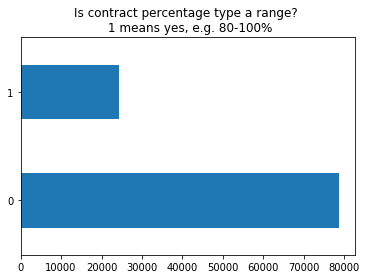

In [36]:
df['contract_pct_type_is_range'].astype('category').value_counts().plot.barh(title = 'Is contract percentage type a range? \n 1 means yes, e.g. 80-100%')
None

### package_id

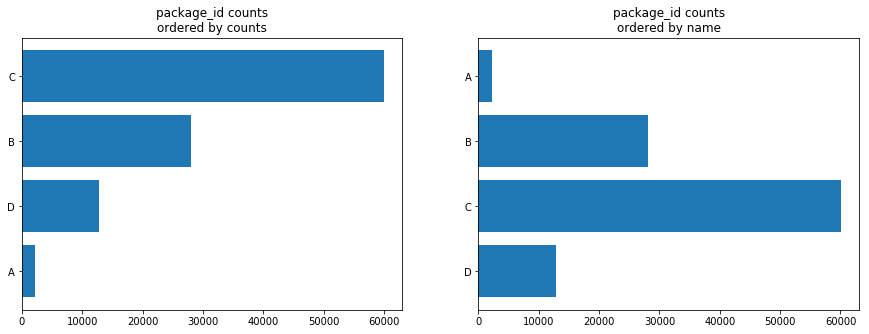

In [37]:
dfc = value_counts_df(df, 'package_id')
fig, ax = plt.subplots(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.barh(dfc['package_id'], dfc['counts'])
plt.title('package_id counts\nordered by counts')
plt.subplot(1, 2, 2)
dfc = value_counts_df(df, 'package_id', 'package_id', False)
plt.barh(dfc['package_id'], dfc['counts'])
plt.title('package_id counts\nordered by name')
None

### industry_name

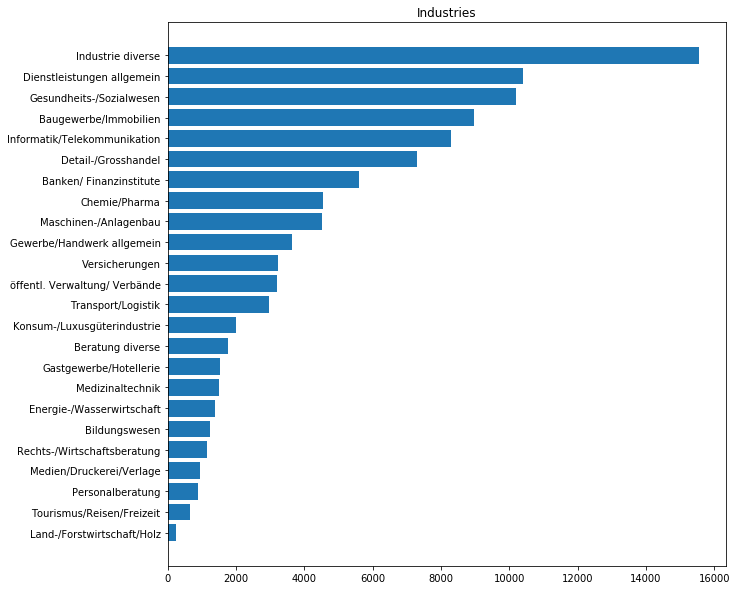

In [38]:
dfc = value_counts_df(df, 'industry_name')
fig, ax = plt.subplots(figsize = (10, 10))
plt.barh(dfc['industry_name'], dfc['counts'])
plt.title('Industries')
None

### job_location

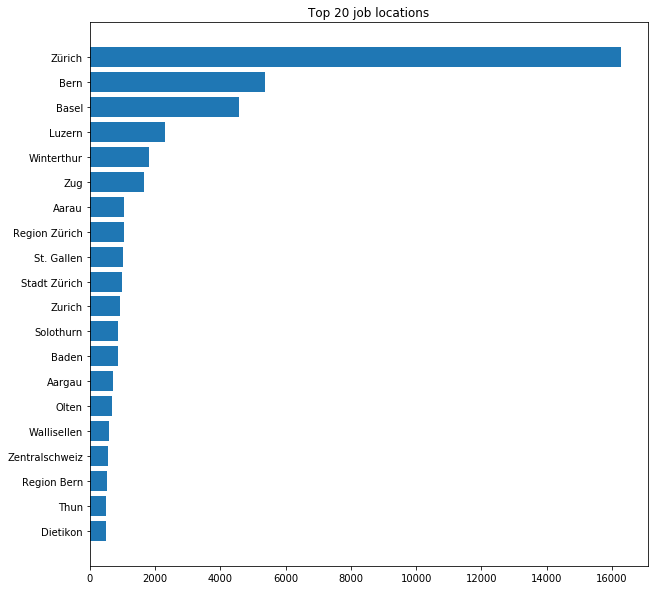

In [39]:
dfc = value_counts_df(df, 'job_location').tail(20)
fig, ax = plt.subplots(figsize = (10, 10))
plt.barh(dfc['job_location'], dfc['counts'])
plt.title('Top 20 job locations')
None

### job_postal_code 

In [41]:
value_counts_df(df, 'job_postal_code').shape[0]

1573

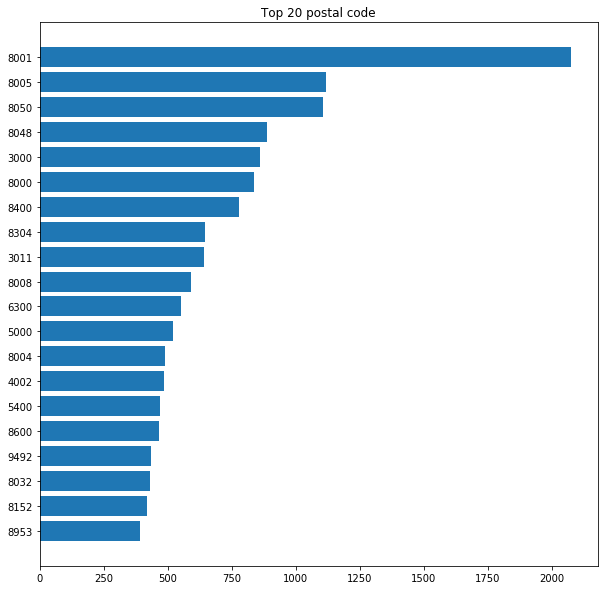

In [42]:
dfc = value_counts_df(df, 'job_postal_code').tail(20)
fig, ax = plt.subplots(figsize = (10, 10))
plt.barh(dfc['job_postal_code'], dfc['counts'])
plt.title('Top 20 postal code')
None